In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [3]:
iris = datasets.load_iris()
##### --------------- #####
iris = pd.DataFrame(data= np.c_[iris['data'],iris['target']],
                    columns= iris['feature_names'] + ['species'])
##### --------------- #####
iris.columns = iris.columns.str.replace(' ', '') # remove spaces form column name
iris.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [19]:
X = iris.ix[:,:3]  # independent variables, firs 3 column
y = iris.species   # dependent variable
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [20]:
# K means cluster
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)
print(model.labels_)
print(model.labels_.dtype)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
int32


In [21]:
# transfer the int32 dtype to np.int64
iris['pred_species'] =  np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
iris.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species,pred_species
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,0
2,4.7,3.2,1.3,0.2,0.0,0
3,4.6,3.1,1.5,0.2,0.0,0
4,5.0,3.6,1.4,0.2,0.0,0


In [22]:
print('Accuracy : {}'.format(accuracy_score(iris.species, iris.pred_species)))
print(classification_report(iris.species, iris.pred_species))

Accuracy : 0.8066666666666666
             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99        50
        1.0       0.71      0.70      0.71        50
        2.0       0.71      0.74      0.73        50

avg / total       0.81      0.81      0.81       150



In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

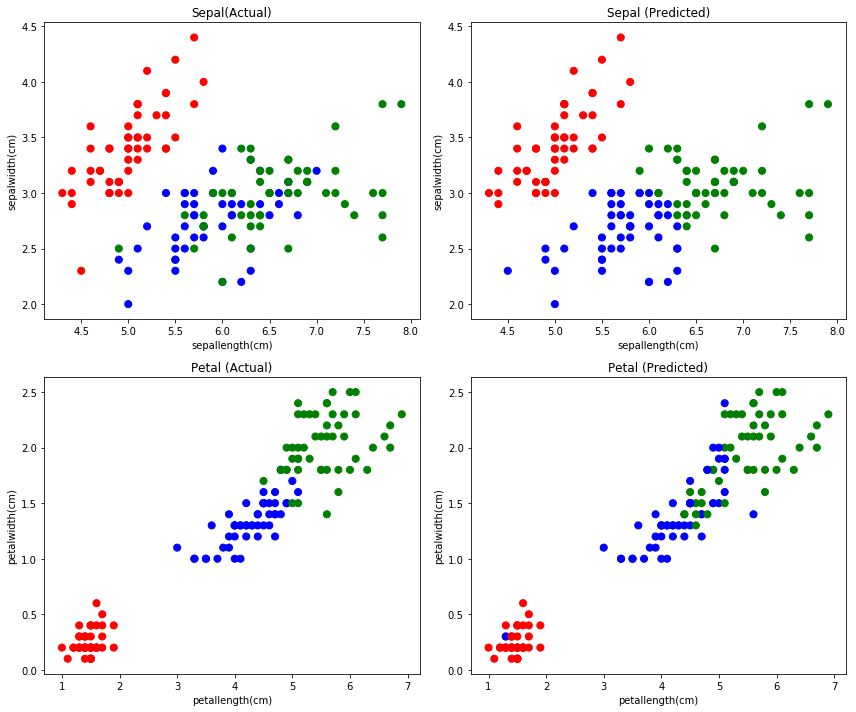

In [24]:
plt.figure(figsize=(12, 10))
colormap = np.array(['red', 'blue', 'green'])

plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'],
c=colormap[iris.species.astype(np.int64)], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal(Actual)')

plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'],
c=colormap[iris.pred_species.astype(np.int64)], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'],
c=colormap[iris.species.astype(np.int64)],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'],
c=colormap[iris.pred_species.astype(np.int64)],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()

In [64]:
from scipy.spatial.distance import cdist

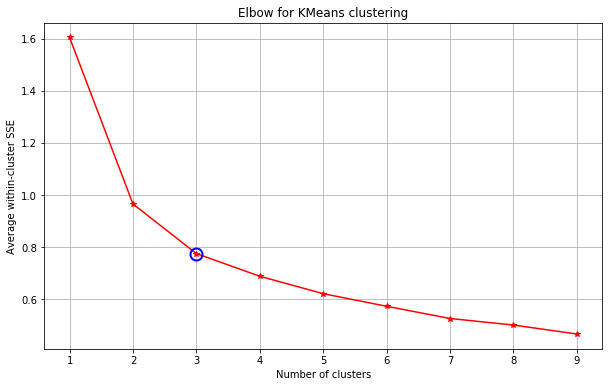

In [65]:
K = range(1, 10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
# KM[0], n_clusters = 1
# KM[1], n_clusters = 2
# KM[2], n_clusters = 3
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]

dist = [np.min(D,axis=1) for D in D_k]

avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]

kIdx = 2

# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,6))
plt.subplot()
plt.plot(K, avgWithinSS, 'r*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
    markeredgewidth=2, markeredgecolor='b', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster SSE')
plt.title('Elbow for KMeans clustering')
plt.show()